# Experimental Design
In this notebook we will introduce experimental design, starting with a few preliminary EDA steps and leading up to a hypothesis test. The dataset that is used in this notebook contains the [weight and height of 1000 individuals](https://www.kaggle.com/mustafaali96/weight-height) and it was obtained from Kaggle
source: https://www.kaggle.com/mustafaali96/weight-height

Outline:
1. Explore the data (briefly)
2. Summarize the data numerically
3. Visualize the data and comment on any patterns
4. Perform an experiment to determine if the patterns are statistically significant
5. Review the results

This module will introduce a new library, SciPy. You can learn more about SciPy [at the following link](https://docs.scipy.org/doc/scipy/reference/).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv('weight-height.csv')

dims = df.shape
print('The data contains {} rows and {} columns.'.format(dims[0], dims[1]))

The data contains 10000 rows and 3 columns.


In [3]:
df.head() #view a sample of the data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


## Descriptive Statistics
There are various techniques that allow us to understand our data. We can use various types of visualizations; however, we can also summarize the data numerically to understand the values that it contains, the central tendency and also the spread.

### Measures of Central Tendency
The `mean` and `median` informs us about the center of our dataset and this is where we can often expect to find the average values for our sample. 

In [4]:
df['Height'].mean() #the mean height

66.36755975482106

In [5]:
df['Height'].median() #the median height

66.31807008178465

In [6]:
df.mean() #the mean of all numeric values in the dataset


Height     66.367560
Weight    161.440357
dtype: float64

In [7]:
#TODO: can you find the median of all numeric values in the dataframe?


The mean and median height of people in this dataset is `66.36` and `66.31` respectively. The mean and median are approximately the same, therefore when we visualize the distribution we can expect a symmetric curve. If the distribution is asymmetric, it will have a positive or negative skew which indicates the presence of outliers. The value for the mean is heavily influenced by outliers which will result in the mean and median no longer maintain that symmetry. Therefore, when the data is skewed, the median is often preferred as the measure of central tendency over the mean.

#### Skewness

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Relationship_between_mean_and_median_under_different_skewness.png/640px-Relationship_between_mean_and_median_under_different_skewness.png'></img>
<p style='font-size:8px; text-align:center'>Credit: <a href='https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa'>Diva Jain</a></p>

### Measures of Dispersion
This helps us to evaluate the spread in terms of the range of values within the data, and we can also determine how much each observation deviates from the mean.

In [8]:
#Calculate the range
height_range = df['Height'].max() - df['Height'].min()
height_range = round(height_range, 3) #round to three decimal places
print('The range is: ', height_range)

The range is:  24.736


In [9]:
#TODO: Calculate the range for the weight

In [10]:
#Calculate the variance
variance = df['Height'].var()
print('The variance is: ', variance)

The variance is:  14.803472640140804


In [11]:
#TODO: Calculate the variance for the weight

In [12]:
#Calculate the std deviation
dev = df['Height'].std()
print('The std deviation is: ', dev)

The std deviation is:  3.847528120773233


In [13]:
#TODO: Calculate the std deviation for the weight

### The Frequency

In [14]:
#Obtain the frequency

print('The frequency is: ', df['Gender'].count())
print('The frequency for each gender: \n', df['Gender'].value_counts())
print('The number of unique genders in the data: ', df['Gender'].nunique())

The frequency is:  10000
The frequency for each gender: 
 Female    5000
Male      5000
Name: Gender, dtype: int64
The number of unique genders in the data:  2


`TIP:` the **describe()** method gives us the descriptive statistics for all variables using one line of code.

In [15]:
df.describe(include='all') 


,Gender,Height,Weight
count,10000,10000.000000,10000.000000
unique,2,NaN,NaN
top,Female,NaN,NaN
freq,5000,NaN,NaN
mean,NaN,66.367560,161.440357
std,NaN,3.847528,32.108439
min,NaN,54.263133,64.700127
25%,NaN,63.505620,135.818051
50%,NaN,66.318070,161.212928
75%,NaN,69.174262,187.169525


The summary statistics shows that the three columns/variables are: gender, height and weight. There are two genders that are reflected in this dataset. The minimum height is `54.2` inches, the maximum height is `78.9` inches and the average height of our sample is `66.36` inches and the standard deviation is `3.8`. The median height is represented by the `50%` statistic and it is `66.31`. The mean and median are approximately the same, so we can expect a symmetric curve when this data is visualized.

The minimum and maximum values for the weight are `64.7` and `269.9` pounds. The average weight is `161.4` and the standard deviation is `32.1`. We can also see that the median weight is approximately the same as the mean and it is `161.2` pounds.

Based on the summary statistics above, the range of values appear to be suitable and there does not appear to be any extraneous values based on this preliminary review of the descriptive statistics.

## Brief Data Exploration
Let's explore the data visually!

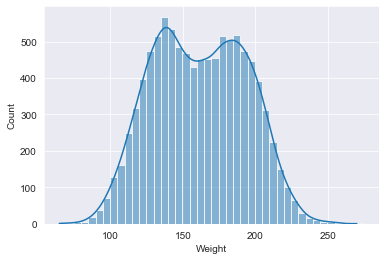

In [16]:
sns.histplot(data=df, x='Weight', kde=True, binwidth=5)
plt.show()

The histogram above has a bi-modal distribution. Seeing that the dataset contains data on males and females. Let's visualize this and group by the gender to see if this gives any indication of the pattern that is apparent.

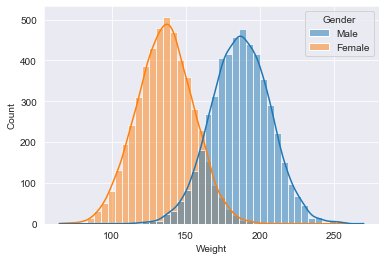

In [17]:
sns.histplot(data=df, x='Weight', hue='Gender', kde=True)
plt.show()

We can now see that the modality is based on the weight of the different genders. If we examine the peak of each curve it shows the area where most of the data resides. Therefore, the weight of most females in the dataset is approximately 130 pounds while males are approximately 190 pounds. Let's also view the distribution of height and then group by Gender.

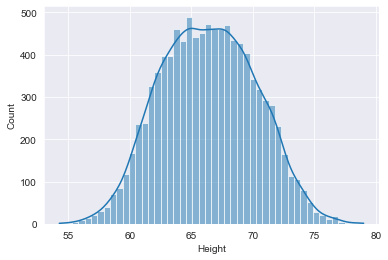

In [18]:
sns.histplot(data=df, x='Height', kde=True)
plt.show()

The histogram above doesn’t have a clearly defined peak and the data doesn’t appear to be skewed either. However, based on the previous analysis, let's group by gender to determine if we can gain any useful insights.

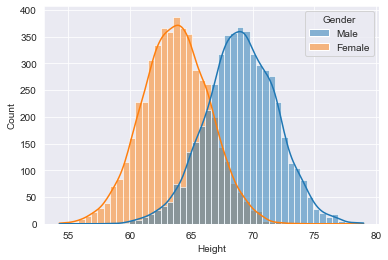

In [19]:
sns.histplot(data=df, x='Height', hue='Gender', kde=True)
plt.show()

The chart above allows us to see that there is also a clear distinction between the range of values for the height of males and females which was not easily identified when the entire data was visualized. The height of most females in this dataset is approx. 63 inches while males are approx. 70 inches and a slight skew (i.e. right) is apparent.

Based on the EDA above there appears to be a clear distinction between the range of values for the height and weight of males and females in this dataset. 

Let's view the pair-wise relationship between the height and weight to determine if there are any patterns or trends that are visually apparent.

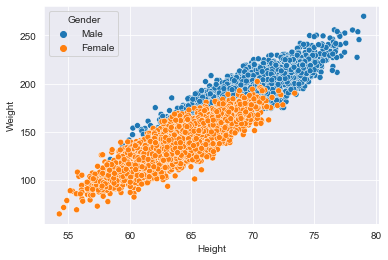

In [20]:
sns.scatterplot(data=df, x='Height', y='Weight', hue='Gender')
plt.show()

There is a positive linear relationship between height and weight, and this appears to be a strong bivariate relationship based on how tightly clustered the data points appear. However, we will use statistical tests if our observations about these patterns are statistically significant.

## Statistical Tests
Let’s test the following:
- is the difference in the weight of Males and Females statistically significant, and
- is there a correlation between height and weight

### Hypothesis Test

In [21]:
#two sample t-test: is there a difference in the weight of Males and Females

#extract the data for males and females
sample_male   = df[df['Gender'] == 'Male']['Weight']
sample_female = df[df['Gender'] == 'Female']['Weight']


alpha = 0.05
t_stat, p_value = stats.ttest_ind(sample_male, sample_female) #perform the t-test

#compare the p_value with alpha to determine the significance
if(p_value < alpha):
    print('The weight of males and females are statistically different.')
    
#The observed difference from our visualization/EDA appears to be plausible!    

The weight of males and females are statistically different.


### Pearson correlation coefficient

Let's quantify the correlation between height and weight using the Pearson correlation coefficient. This will help to confirm the visual analysis of the linear relationship that we previously observed.

In [22]:

corr, p_value = stats.pearsonr(df['Height'], df['Weight'])
print('The correlation coefficient is: ', corr)
print('The p-value is: ', p_value)

The correlation coefficient is:  0.9247562987409148
The p-value is:  0.0


The result indicate that the correlation coefficient is `0.925`, which is a strong positive correlation. The p-value reveals that its unlikely that this pattern would appear if no correlation was evident.